In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/api-sp-pop-totl-ds2-en/API_SP.POP.TOTL_DS2_en_csv_v2_2001050.csv


# Import Libs

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
# Adjust the path to match your Kaggle environment
file_path = "/kaggle/input/api-sp-pop-totl-ds2-en/API_SP.POP.TOTL_DS2_en_csv_v2_2001050.csv"

# Load the dataset, skipping the first 4 rows that contain metadata
df = pd.read_csv(file_path, skiprows=4)

# Display the first few rows of the dataset
df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,Unnamed: 68
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54608.0,55811.0,56682.0,57475.0,58178.0,58782.0,...,104257.0,104874.0,105439.0,105962.0,106442.0,106585.0,106537.0,106445.0,106277.0,NaN
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130692579.0,134169237.0,137835590.0,141630546.0,145605995.0,149742351.0,...,600008424.0,616377605.0,632746570.0,649757148.0,667242986.0,685112979.0,702977106.0,720859132.0,739108306.0,NaN
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8622466.0,8790140.0,8969047.0,9157465.0,9355514.0,9565147.0,...,33753499.0,34636207.0,35643418.0,36686784.0,37769499.0,38972230.0,40099462.0,41128771.0,42239854.0,NaN
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,97256290.0,99314028.0,101445032.0,103667517.0,105959979.0,108336203.0,...,408690375.0,419778384.0,431138704.0,442646825.0,454306063.0,466189102.0,478185907.0,490330870.0,502789511.0,NaN
4,Angola,AGO,"Population, total",SP.POP.TOTL,5357195.0,5441333.0,5521400.0,5599827.0,5673199.0,5736582.0,...,28127721.0,29154746.0,30208628.0,31273533.0,32353588.0,33428486.0,34503774.0,35588987.0,36684202.0,NaN


# EDA (Cleaning , Analysis , Vis)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 69 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    266 non-null    object 
 1   Country Code    266 non-null    object 
 2   Indicator Name  266 non-null    object 
 3   Indicator Code  266 non-null    object 
 4   1960            264 non-null    float64
 5   1961            264 non-null    float64
 6   1962            264 non-null    float64
 7   1963            264 non-null    float64
 8   1964            264 non-null    float64
 9   1965            264 non-null    float64
 10  1966            264 non-null    float64
 11  1967            264 non-null    float64
 12  1968            264 non-null    float64
 13  1969            264 non-null    float64
 14  1970            264 non-null    float64
 15  1971            264 non-null    float64
 16  1972            264 non-null    float64
 17  1973            264 non-null    flo

In [5]:
df.describe()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,Unnamed: 68
count,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,...,2.650000e+02,2.650000e+02,2.650000e+02,2.650000e+02,2.650000e+02,2.650000e+02,2.650000e+02,2.650000e+02,2.650000e+02,0.0
mean,1.157939e+08,1.173869e+08,1.195401e+08,1.222050e+08,1.248922e+08,1.276182e+08,1.304676e+08,1.333152e+08,1.362430e+08,1.392759e+08,...,2.986442e+08,3.024871e+08,3.063370e+08,3.101259e+08,3.138348e+08,3.174293e+08,3.206783e+08,3.236218e+08,3.269710e+08,NaN
std,3.639920e+08,3.684672e+08,3.751049e+08,3.837174e+08,3.923714e+08,4.011556e+08,4.104328e+08,4.196670e+08,4.291879e+08,4.390998e+08,...,9.336474e+08,9.448081e+08,9.559803e+08,9.668651e+08,9.774204e+08,9.875137e+08,9.965683e+08,1.004474e+09,1.013469e+09,NaN
min,2.646000e+03,2.888000e+03,3.171000e+03,3.481000e+03,3.811000e+03,4.161000e+03,4.531000e+03,4.930000e+03,5.354000e+03,5.646000e+03,...,1.087700e+04,1.085200e+04,1.082800e+04,1.086500e+04,1.095600e+04,1.106900e+04,1.120400e+04,1.131200e+04,1.139600e+04,NaN
25%,5.132212e+05,5.231345e+05,5.337595e+05,5.449288e+05,5.566630e+05,5.651150e+05,5.691470e+05,5.773872e+05,5.832700e+05,5.875942e+05,...,1.788196e+06,1.777557e+06,1.791003e+06,1.797085e+06,1.788878e+06,1.790133e+06,1.786038e+06,1.768086e+06,1.756374e+06,NaN
50%,3.708088e+06,3.816540e+06,3.931214e+06,4.033994e+06,4.112910e+06,4.194930e+06,4.257383e+06,4.317222e+06,4.410692e+06,4.515734e+06,...,1.035808e+07,1.032545e+07,1.030030e+07,1.039533e+07,1.044767e+07,1.060623e+07,1.050577e+07,1.048694e+07,1.059380e+07,NaN
75%,2.670606e+07,2.748694e+07,2.830289e+07,2.914708e+07,3.001684e+07,3.084892e+07,3.163010e+07,3.209247e+07,3.249927e+07,3.277149e+07,...,6.073058e+07,6.062750e+07,6.053671e+07,6.042176e+07,5.987258e+07,6.170452e+07,6.358833e+07,6.549775e+07,6.743811e+07,NaN
max,3.031517e+09,3.072470e+09,3.126894e+09,3.193470e+09,3.260480e+09,3.328243e+09,3.398510e+09,3.468395e+09,3.540186e+09,3.614593e+09,...,7.404251e+09,7.490956e+09,7.577110e+09,7.661178e+09,7.742725e+09,7.821272e+09,7.888964e+09,7.951595e+09,8.024997e+09,NaN


In [6]:
df.isnull().sum()

Country Name        0
Country Code        0
Indicator Name      0
Indicator Code      0
1960                2
                 ... 
2020                1
2021                1
2022                1
2023                1
Unnamed: 68       266
Length: 69, dtype: int64

In [7]:
df

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,Unnamed: 68
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54608.0,55811.0,56682.0,57475.0,58178.0,58782.0,...,104257.0,104874.0,105439.0,105962.0,106442.0,106585.0,106537.0,106445.0,106277.0,NaN
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130692579.0,134169237.0,137835590.0,141630546.0,145605995.0,149742351.0,...,600008424.0,616377605.0,632746570.0,649757148.0,667242986.0,685112979.0,702977106.0,720859132.0,739108306.0,NaN
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8622466.0,8790140.0,8969047.0,9157465.0,9355514.0,9565147.0,...,33753499.0,34636207.0,35643418.0,36686784.0,37769499.0,38972230.0,40099462.0,41128771.0,42239854.0,NaN
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,97256290.0,99314028.0,101445032.0,103667517.0,105959979.0,108336203.0,...,408690375.0,419778384.0,431138704.0,442646825.0,454306063.0,466189102.0,478185907.0,490330870.0,502789511.0,NaN
4,Angola,AGO,"Population, total",SP.POP.TOTL,5357195.0,5441333.0,5521400.0,5599827.0,5673199.0,5736582.0,...,28127721.0,29154746.0,30208628.0,31273533.0,32353588.0,33428486.0,34503774.0,35588987.0,36684202.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,"Population, total",SP.POP.TOTL,990150.0,1014211.0,1038618.0,1063175.0,1087700.0,1111812.0,...,1788196.0,1777557.0,1791003.0,1797085.0,1788878.0,1790133.0,1786038.0,1768086.0,1756374.0,NaN
262,"Yemen, Rep.",YEM,"Population, total",SP.POP.TOTL,5542459.0,5646668.0,5753386.0,5860197.0,5973803.0,6097298.0,...,28516545.0,29274002.0,30034389.0,30790513.0,31546691.0,32284046.0,32981641.0,33696614.0,34449825.0,NaN
263,South Africa,ZAF,"Population, total",SP.POP.TOTL,16520441.0,16989464.0,17503133.0,18042215.0,18603097.0,19187194.0,...,55876504.0,56422274.0,56641209.0,57339635.0,58087055.0,58801927.0,59392255.0,59893885.0,60414495.0,NaN
264,Zambia,ZMB,"Population, total",SP.POP.TOTL,3119430.0,3219451.0,3323427.0,3431381.0,3542764.0,3658024.0,...,16248230.0,16767761.0,17298054.0,17835893.0,18380477.0,18927715.0,19473125.0,20017675.0,20569737.0,NaN


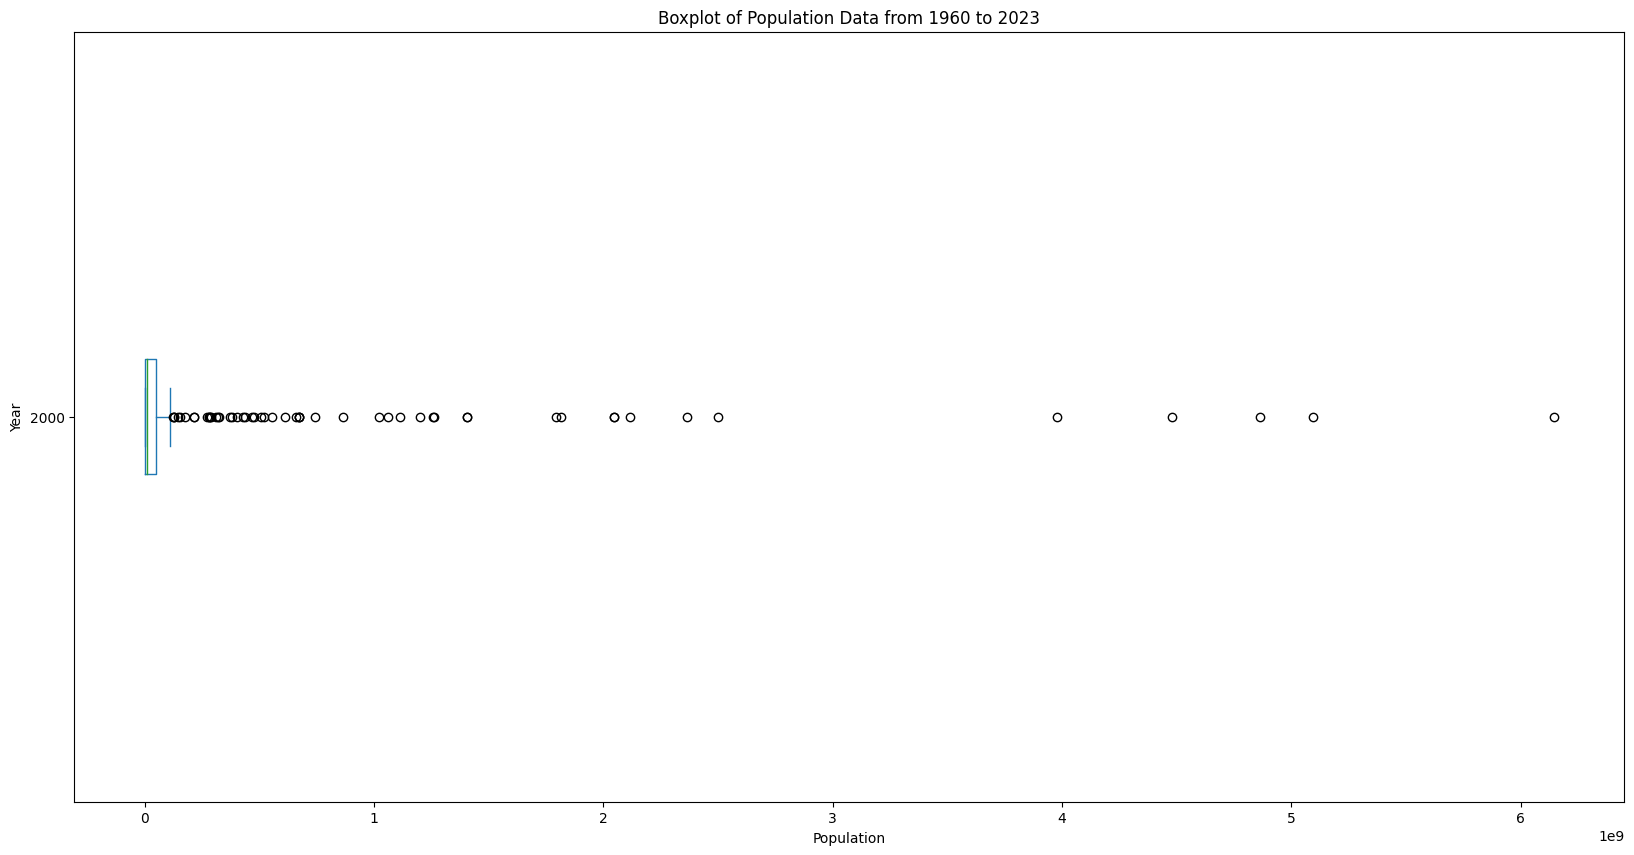

In [8]:
#checking the outliers in 1960 till 2023
# Set up the plotting area
plt.figure(figsize=(20, 10))

# Plot a boxplot for each year
df["2000"].plot(kind='box', figsize=(20, 10), vert=False)

# Set plot title and labels
plt.title('Boxplot of Population Data from 1960 to 2023')
plt.xlabel('Population')
plt.ylabel('Year')

# Show the plot
plt.show()

In [9]:
df["1960"] = df["1960"].fillna(value="median")

In [10]:
df["1960"].isnull().sum()

0

In [11]:
df = df.drop(columns=["Unnamed: 68"],axis=1)

In [12]:
num_col = df.select_dtypes("number").columns

num_col

Index(['1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969',
       '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023'],
      dtype='object')

In [13]:
from sklearn.impute import SimpleImputer

In [14]:
imputer_num = SimpleImputer(strategy="median")

In [15]:
df[num_col] = imputer_num.fit_transform(df[num_col])

In [16]:
df.isnull().sum()

Country Name      0
Country Code      0
Indicator Name    0
Indicator Code    0
1960              0
                 ..
2019              0
2020              0
2021              0
2022              0
2023              0
Length: 68, dtype: int64

In [17]:
df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54608.0,55811.0,56682.0,57475.0,58178.0,58782.0,...,103594.0,104257.0,104874.0,105439.0,105962.0,106442.0,106585.0,106537.0,106445.0,106277.0
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130692579.0,134169237.0,137835590.0,141630546.0,145605995.0,149742351.0,...,583651101.0,600008424.0,616377605.0,632746570.0,649757148.0,667242986.0,685112979.0,702977106.0,720859132.0,739108306.0
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8622466.0,8790140.0,8969047.0,9157465.0,9355514.0,9565147.0,...,32716210.0,33753499.0,34636207.0,35643418.0,36686784.0,37769499.0,38972230.0,40099462.0,41128771.0,42239854.0
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,97256290.0,99314028.0,101445032.0,103667517.0,105959979.0,108336203.0,...,397855507.0,408690375.0,419778384.0,431138704.0,442646825.0,454306063.0,466189102.0,478185907.0,490330870.0,502789511.0
4,Angola,AGO,"Population, total",SP.POP.TOTL,5357195.0,5441333.0,5521400.0,5599827.0,5673199.0,5736582.0,...,27128337.0,28127721.0,29154746.0,30208628.0,31273533.0,32353588.0,33428486.0,34503774.0,35588987.0,36684202.0


In [18]:
# Assuming 'data' is your DataFrame and has been filtered for 2023
population_2023 = df[['Country Name', '2023']].dropna()

# Create a histogram using Plotly Express
fig = px.histogram(population_2023, x='2023', nbins=30,
                   title='Population Distribution in 2023',
                   labels={'2023': 'Population'},
                   color_discrete_sequence=['blue'])

# Update layout for better readability
fig.update_layout(xaxis_title='Population',
                  yaxis_title='Number of Countries',
                  xaxis=dict(gridcolor='lightgray'),
                  yaxis=dict(gridcolor='lightgray'))

# Show the plot
fig.show()

In [19]:
# Create a bar chart using Plotly Express
fig = px.bar(population_2023, x='Country Name', y='2023',
             title='Population of Countries in 2023',
             labels={'Country Name': 'Country', '2023': 'Population'},
             color='2023', color_continuous_scale='Viridis')

# Update layout for better readability and adjust figure size
fig.update_layout(
    xaxis_title='Country',
    yaxis_title='Population',
    xaxis_tickangle=-45,
    xaxis=dict(gridcolor='lightgray'),
    yaxis=dict(gridcolor='lightgray'),
    width=1200,  # Adjust width as needed
    height=800    # Adjust height as needed
)

# Show the plot
fig.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



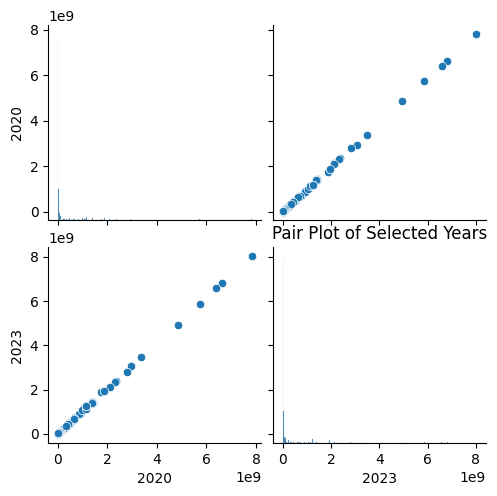

In [20]:
numerical_data = df[['1960', '2020', '2023']]  # Add more columns if needed

# Create a pair plot
sns.pairplot(numerical_data)
plt.title('Pair Plot of Selected Years')
plt.show()


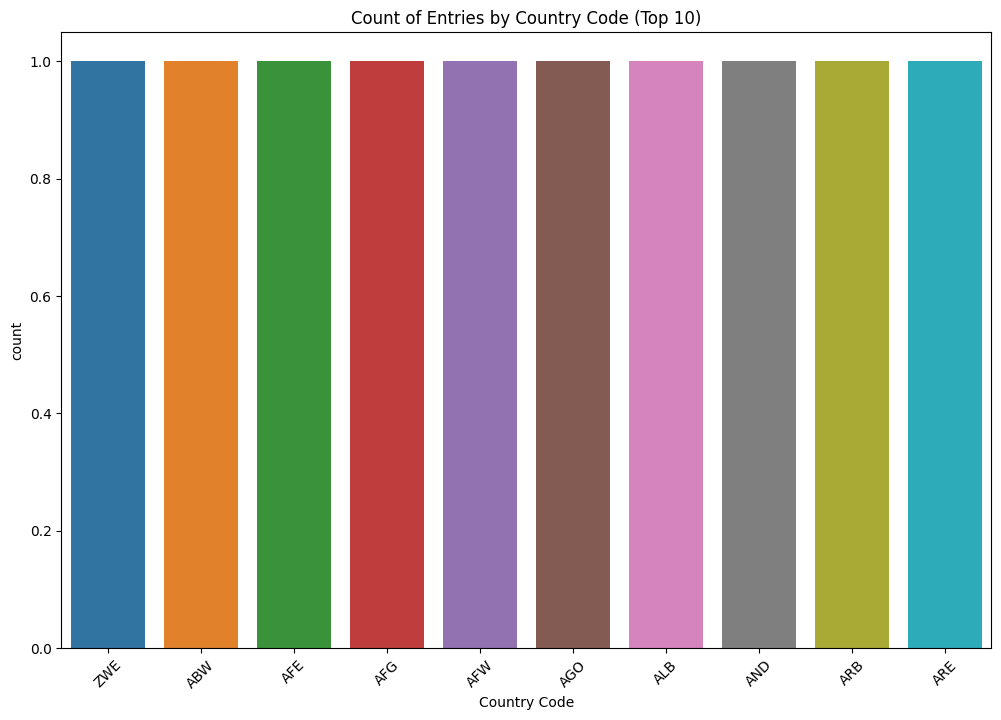

In [21]:
# Select the top N categories with the highest counts

# Count occurrences of each 'Country Code'
counts = df['Country Code'].value_counts()
top_n = 10  # You can adjust this number based on your preference
top_categories = counts.head(top_n).index

# Filter data to include only top categories
filtered_data = df[df['Country Code'].isin(top_categories)]

# Create the count plot for the top categories
plt.figure(figsize=(12, 8))
sns.countplot(data=filtered_data, x='Country Code', order=top_categories)
plt.title(f'Count of Entries by Country Code (Top {top_n})')
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.show()

In [22]:
# Assuming 'data' is your DataFrame and you've cleaned it
population_2023 = df[['Country Name', '2023']].dropna()

# Sort the data by population in descending order and select the top N countries
top_n = 10  # Number of top countries to display
top_countries = population_2023.sort_values(by='2023', ascending=False).head(top_n)

# Create a pie chart using Plotly Express
fig_pie = px.pie(top_countries, names='Country Name', values='2023',
                 title='Population Distribution by Country in 2023 (Top Countries)',
                 labels={'Country Name': 'Country', '2023': 'Population'},
                 color='2023')

# Show the plot
fig_pie.show()

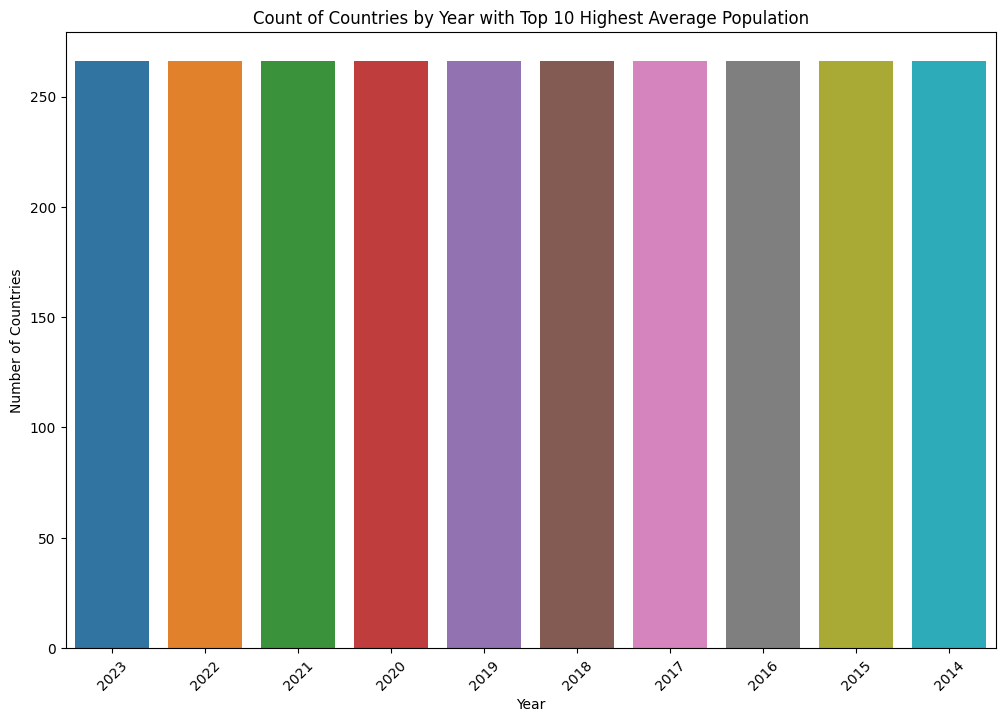

In [23]:
# Reshape the data to have 'Year' as a column and 'Population' as values
data_long = df.melt(id_vars=['Country Name'], 
                    value_vars=[str(year) for year in range(1960, 2024)],
                    var_name='Year', 
                    value_name='Population')

# Convert 'Year' column to integer type
data_long['Year'] = data_long['Year'].astype(int)

# Convert 'Population' column to numeric, forcing errors to NaN
data_long['Population'] = pd.to_numeric(data_long['Population'], errors='coerce')

# Find the top N years with the highest average population
top_n = 10  # Number of top years to display
top_years = data_long.groupby('Year')['Population'].mean().sort_values(ascending=False).head(top_n).index

# Filter data to include only these top years
filtered_data = data_long[data_long['Year'].isin(top_years)]

# Create the count plot for the top years
plt.figure(figsize=(12, 8))
sns.countplot(data=filtered_data, x='Year', order=top_years)
plt.title(f'Count of Countries by Year with Top {top_n} Highest Average Population')
plt.xlabel('Year')
plt.ylabel('Number of Countries')
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.show()